In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [18]:
# Load the dataset
data = pd.read_csv(r"E:\OneDrive\Desktop\CLICK\Amrita\SEM 5\PROJECTS\Project_comp_sec\RISS_RansomwareDataset.csv")

# Prepare features and target
X = data.drop(data.columns[[0, 2]], axis=1)  # Drop both the first (ID) and third (target) columns from features
Y = data.iloc[:, 2]  # Third column is used as the target


In [19]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Normalize the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape the data for CNN input (3D)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [20]:
# Build the CNN model
model = Sequential()
model.add(Conv1D(64, 3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(len(np.unique(y_train)), activation='softmax'))  # Output layer for classification

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


C:\Users\achil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
# One-hot encode the target labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [22]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)

# Generate predictions
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)  # Convert to class labels
y_test_labels = np.argmax(y_test, axis=1)  # Convert one-hot encoded y_test back to labels

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test_labels, y_pred_labels))


Epoch 1/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.5767 - loss: 2.9159
Epoch 2/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 53s 1s/step - accuracy: 0.8823 - loss: 0.3799
Epoch 3/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.9363 - loss: 0.2153
Epoch 4/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.9435 - loss: 0.1837
Epoch 5/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9403 - loss: 0.1731
Epoch 6/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9628 - loss: 0.1166
Epoch 7/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.9516 - loss: 0.1357
Epoch 8/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 89359s 1s/step - accuracy: 0.9584 - loss: 0.1506
Epoch 9/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.9760 - loss: 0.1252
Epoch 10/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.9712 - loss: 0.0959
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 265ms/step - accuracy: 0.8178 - loss: 0.9625
Test Accuracy: 0.8098360896110535
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 280ms/step

Class

C:\Users\achil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\achil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\achil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati


Confusion Matrix:


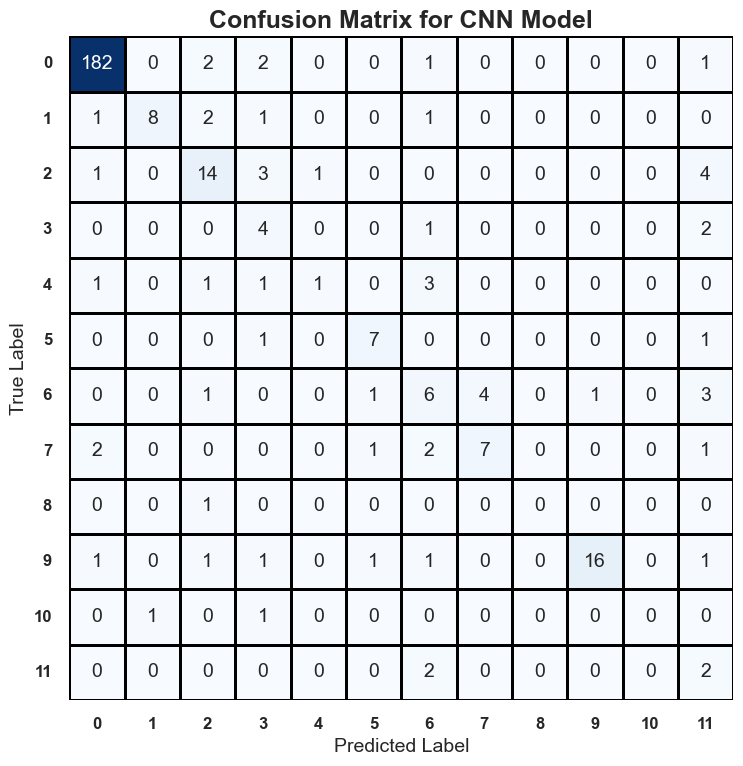

In [23]:
# Function to plot styled confusion matrix
def plot_styled_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 8))
    sns.set_theme(style="white", context="talk")  # Better aesthetic settings
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                linewidths=2, linecolor='black', square=True, annot_kws={"size": 14})
    plt.title(f'Confusion Matrix for {model_name}', fontsize=18, weight='bold')
    plt.xlabel('Predicted Label', fontsize=14)
    plt.ylabel('True Label', fontsize=14)
    plt.xticks(fontsize=12, weight='bold')
    plt.yticks(fontsize=12, weight='bold', rotation=0)
    plt.tight_layout()
    plt.show()

# Plot confusion matrix
print("\nConfusion Matrix:")
plot_styled_confusion_matrix(y_test_labels, y_pred_labels, 'CNN Model')


10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 283ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       188
           1       0.89      0.62      0.73        13
           2       0.64      0.61      0.62        23
           3       0.29      0.57      0.38         7
           4       0.50      0.14      0.22         7
           5       0.70      0.78      0.74         9
           6       0.35      0.38      0.36        16
           7       0.64      0.54      0.58        13
           8       0.00      0.00      0.00         1
           9       0.94      0.73      0.82        22
          10       0.00      0.00      0.00         2
          11       0.13      0.50      0.21         4

    accuracy                           0.81       305
   macro avg       0.50      0.49      0.47       305
weighted avg       0.84      0.81      0.82       305


Confusion Matrix for the stacking model:


C:\Users\achil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\achil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\achil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

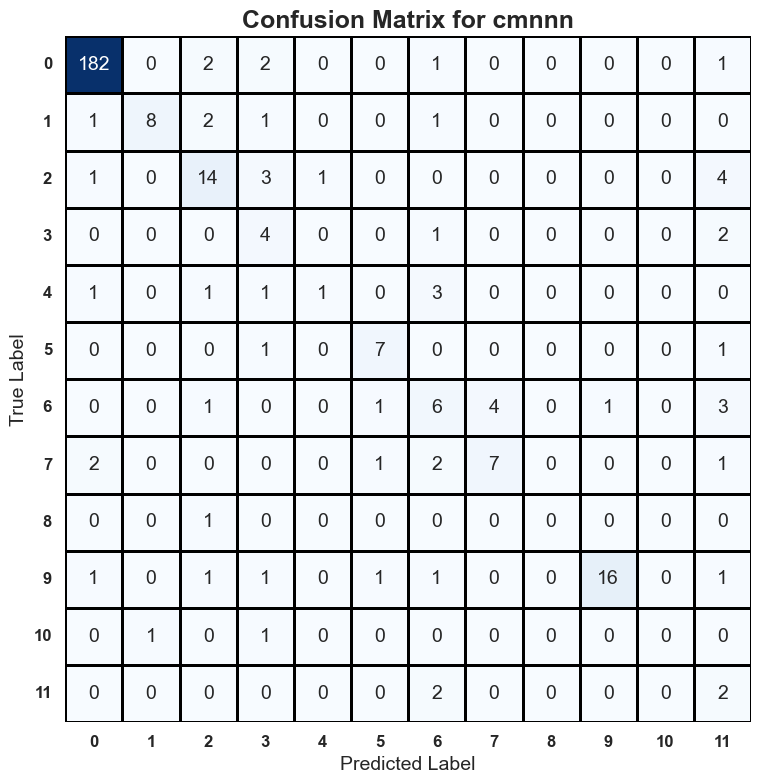

In [24]:
# Generate predictions
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)  # Convert to class labels
y_test_labels = np.argmax(y_test, axis=1)  # Convert one-hot encoded y_test back to labels

print("\nClassification Report:")
print(classification_report(y_test_labels, y_pred_labels))

# Function to plot styled confusion matrix
def plot_styled_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 8))
    sns.set(style="whitegrid")
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                linewidths=2, linecolor='black', square=True, annot_kws={"size": 14})
    plt.title(f'Confusion Matrix for {model_name}', fontsize=18, weight='bold')
    plt.xlabel('Predicted Label', fontsize=14)
    plt.ylabel('True Label', fontsize=14)
    plt.xticks(fontsize=12, weight='bold')
    plt.yticks(fontsize=12, weight='bold', rotation=0)
    plt.tight_layout()
    plt.show()

# Plot confusion matrix
print("\nConfusion Matrix for the stacking model:")
plot_styled_confusion_matrix(y_test_labels, y_pred_labels, 'cmnnn')

In [25]:
conf_mat=confusion_matrix(y_test,y_pred)
class_accuracies = conf_mat.diagonal() / conf_mat.sum(axis=1)
for idx, acc in enumerate(class_accuracies):
    print(f"Accuracy for class {idx}: {acc:.2f}")

ValueError: Classification metrics can't handle a mix of multilabel-indicator and continuous-multioutput targets